<a href="https://colab.research.google.com/github/Sinrez/pyCoursera/blob/master/P02_SimpleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [2]:
x1=np.array([5, 15, 25, 35, 45, 55])
y1=np.array([5, 20, 14, 32, 22, 38])

In [3]:
x=x1.reshape((-1, 1)) # этот массив должен быть двумерным: иметь одну колонку и необходимое количество рядов
y=y1

In [4]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


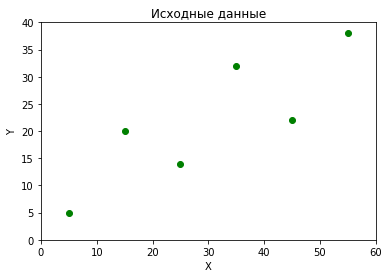

In [5]:
axes = plt.axes()
axes.set_xlim([0, 60])         
axes.set_ylim([0, 40])         
axes.set_xlabel("X")             
axes.set_ylabel("Y")             
legend = []
plt.title('Исходные данные')
plt.scatter(x1, y1, color='green', marker="o")


In [6]:
model = LinearRegression()
model.fit(x, y) # вычисляются оптимальные значение весов, используя существующие вход и выход в качестве аргументов
print('coefficient of determination:', model.score(x, y))
print('intercept:', model.intercept_) # b₀
print('slope:', model.coef_) # b₁

coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]


In [7]:
y_pred = model.predict(x)
print('actual response:', y, sep='\n') 
print('predicted response:', y_pred, sep='\n')

z_pred = model.intercept_ + model.coef_ * x

print('predicted response2:', z_pred, sep='\n')

actual response:
[ 5 20 14 32 22 38]
predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response2:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


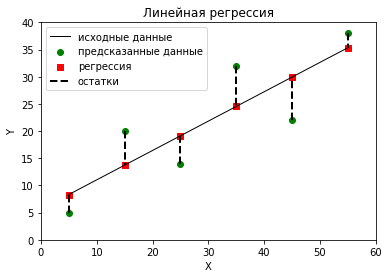

In [8]:
axes = plt.axes()
axes.set_xlim([0, 60])         
axes.set_ylim([0, 40])         
axes.set_xlabel("X")             
axes.set_ylabel("Y")             
legend = []
plt.title('Линейная регрессия')
plt.scatter(x1, y1, color='green', marker="o")
legend.append("исходные данные")

plt.scatter(x1, y_pred, color='red', marker="s")
legend.append("предсказанные данные")

plt.plot(x1, y_pred, color='black', linewidth=1)
legend.append("регрессия")

plt.vlines(x1, y1, y_pred, color='black', linewidth=2, linestyles='dashed')
legend.append("остатки")

plt.legend(legend, loc="upper left")

 
0.54 x + 5.633
           2
-0.001964 x + 0.6579 x + 4.438
           3          2
0.0007315 x - 0.0678 x + 2.263 x - 4.23
           4            3           2
1.875e-05 x - 0.001519 x + 0.02073 x + 1.002 x + 0.4562


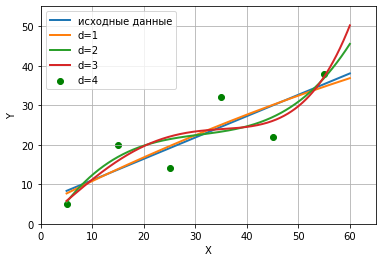

In [9]:
# получаем параметры модели для полинома степени d
axes = plt.axes()
axes.set_xlim([0, 65])         
axes.set_ylim([0, 55])         
axes.set_xlabel("X")             
axes.set_ylabel("Y")
fx = np.linspace(x1[0], x1[-1] + 5, 1000)
legend = []
plt.scatter(x1, y1, color='green', marker="o")
legend.append("исходные данные")

for d in range(1, 5):
    fp = np.polyfit(x1, y1, d)
    # функция-полином, если её напечатать, то увидите математическое выражение
    f = sp.poly1d(fp)
    print(f)
    # рисуем график модельной функции
    
    plt.plot(fx, f(fx), linewidth=2)
    legend.append("d=%i" % f.order)
    
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()